<a href="https://colab.research.google.com/github/torotoro21/GLAUCOMA-DETECTION/blob/ILHAM/Experiment_Hyperparameters_in_MobileNetV2Glaucoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab import drive
import zipfile
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing Dataset

In [ ]:
img_paths = '/content/drive/MyDrive/dataset/Glaukoma.zip'
zip_ref = zipfile.ZipFile(img_paths, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
image_paths=paths.list_images("/content/Glaukoma")
gambar = []
label = []

In [ ]:
from sklearn import preprocessing
for images in image_paths:
  image = Image.open(images)
  image = image.convert('RGB')
  image = np.array(image.resize((224,224))) / 255.0

  gambar.append(image)
  labels=images.split(os.path.sep)[-2]
  label.append(labels)

In [ ]:
labels_train_unique = np.unique(np.array(label))

In [ ]:
temp = np.array(gambar)
print(temp.shape)

(1181, 224, 224, 3)


In [ ]:
temp2=np.array(label)
print(temp2.shape)
print(label)

(1181,)
['normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', '

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
label = lb.fit_transform(label)
print(label)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(gambar), np.array(label), test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(944, 224, 224, 3)
(237, 224, 224, 3)
(944, 1)
(237, 1)


# Experiment BatchSize

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import RMSprop                                    

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import plot_model

'''
> weights='imagenet'            bobot diawal diisi langsung dengan bobotnya "cerdas"nya imagenet (pre-trained), jumlah epoch bisa sedikit
> weights=None                  bobot diawal diisi dengan nilai secara acak (random), jika menggunakan ini perbanyak jumlah epoch
> include_top=False             tidak mengikutsertakan fully-connected layer (karena akan didefinisikan secara terpisah dan menyesuaikan
                                dengan dataset yang dipakai), dengan kata lain yang diambil hanya feature extractor layernya saja
> conv_base.trainable=False     hanya diaktifkan jika weights='imagenet', artinya bobot di feature extractor tidak akan diperbarui saat
                                training (freeze), dengan kata lain "proses belajar" hanya akan dilakukan di fully-connected layer yang
                                telah didefinisikan sebelumnya secara terpisah. (feature extractor hanya tinggal dipakai saja)
'''

conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # ⚠️ SESUAIKAN ⚠️
conv_base.trainable = False                                                                                   # ⚠️ SESUAIKAN ⚠️
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, bs):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=bs, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Batch Size='+str(bs))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
59/59 [==============================] - 13s 50ms/step - loss: 0.6110 - accuracy: 0.6578 - val_loss: 0.5930 - val_accuracy: 0.6751
Epoch 2/50
59/59 [==============================] - 2s 28ms/step - loss: 0.5787 - accuracy: 0.6917 - val_loss: 0.5751 - val_accuracy: 0.6878
Epoch 3/50
59/59 [==============================] - 2s 28ms/step - loss: 0.5542 - accuracy: 0.7278 - val_loss: 0.5593 - val_accuracy: 0.7089
Epoch 4/50
59/59 [==============================] - 2s 28ms/step - loss: 0.5349 - accuracy: 0.7426 - val_loss: 0.5472 - val_accuracy: 0.7173
Epoch 5/50
59/59 [==============================] - 2s 28ms/step - loss: 0.5189 - accuracy: 0.7564 - val_loss: 0.5370 - val_accuracy: 0.7342
Epoch 6/50
59/59 [==============================] - 2s 28ms/step - loss: 0.5061 - accuracy: 0.7648 - val_loss: 0.5277 - val_accuracy: 0.7384
Epoch 7/50
59/59 [==============================] - 2s 28ms/step - loss: 0.4925 - accuracy: 0.7733 - val_loss: 0.5196 - val_accuracy: 0.7468
Epoch 8/50
5

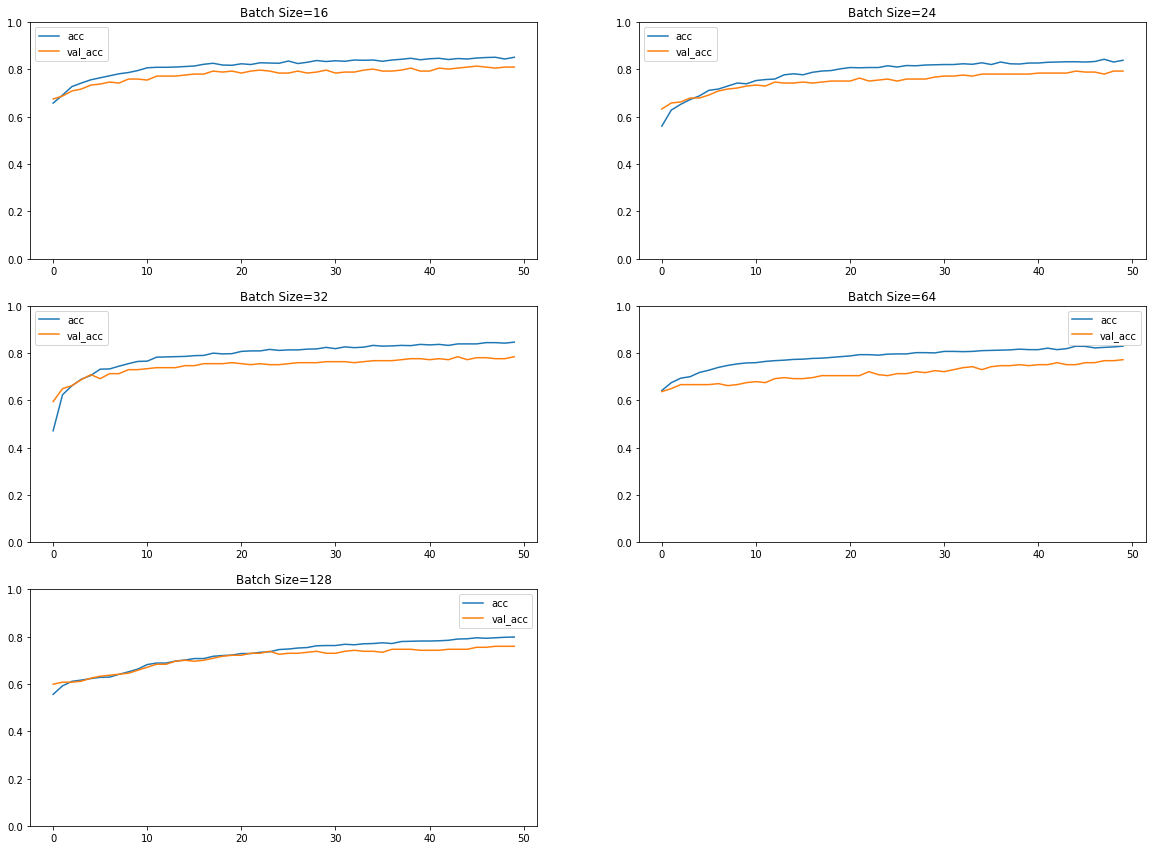

In [ ]:
batch_size = [16, 24, 32, 64, 128]


plt.figure(figsize=(20, 20))
for i in range(len(batch_size)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, batch_size[i])

# show learning curves
plt.show()

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, bs):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=bs, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Batch Size='+str(bs))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
59/59 [==============================] - 5s 50ms/step - loss: 0.6610 - accuracy: 0.6451 - val_loss: 0.6434 - val_accuracy: 0.6371
Epoch 2/50
59/59 [==============================] - 2s 29ms/step - loss: 0.6078 - accuracy: 0.6960 - val_loss: 0.6151 - val_accuracy: 0.6582
Epoch 3/50
59/59 [==============================] - 2s 34ms/step - loss: 0.5776 - accuracy: 0.7225 - val_loss: 0.5921 - val_accuracy: 0.6835
Epoch 4/50
59/59 [==============================] - 2s 30ms/step - loss: 0.5529 - accuracy: 0.7468 - val_loss: 0.5759 - val_accuracy: 0.7131
Epoch 5/50
59/59 [==============================] - 2s 34ms/step - loss: 0.5343 - accuracy: 0.7564 - val_loss: 0.5637 - val_accuracy: 0.7089
Epoch 6/50
59/59 [==============================] - 2s 29ms/step - loss: 0.5198 - accuracy: 0.7606 - val_loss: 0.5551 - val_accuracy: 0.7384
Epoch 7/50
59/59 [==============================] - 2s 29ms/step - loss: 0.5063 - accuracy: 0.7648 - val_loss: 0.5460 - val_accuracy: 0.7342
Epoch 8/50
59

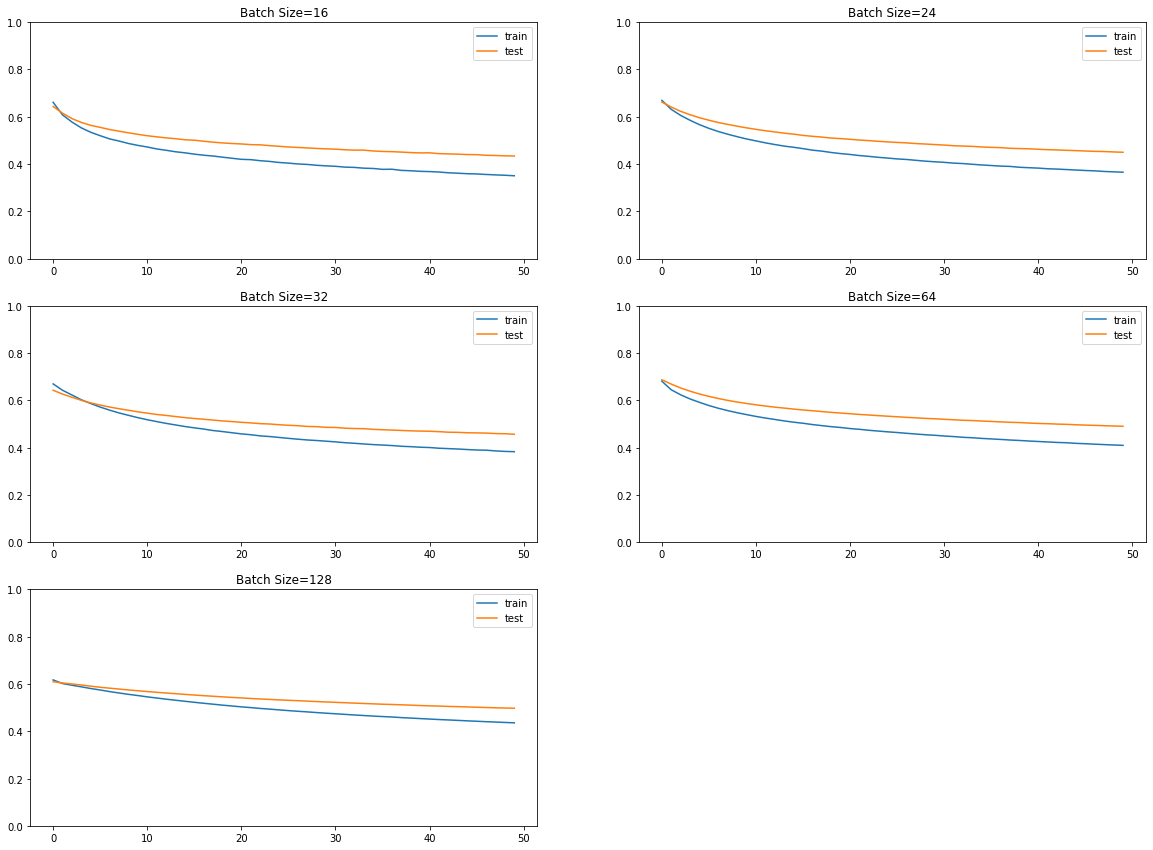

In [ ]:
batch_size = [16, 24, 32, 64, 128]


plt.figure(figsize=(20, 20))
for i in range(len(batch_size)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, batch_size[i])

# show learning curves
plt.show()

# Experiment epoch

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, epoch):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = Adam(learning_rate = 0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=epoch, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Epoch='+str(epoch))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/40
30/30 [==============================] - 5s 97ms/step - loss: 0.6745 - accuracy: 0.6006 - val_loss: 0.6514 - val_accuracy: 0.6287
Epoch 2/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6350 - accuracy: 0.6356 - val_loss: 0.6282 - val_accuracy: 0.6540
Epoch 3/40
30/30 [==============================] - 2s 57ms/step - loss: 0.6140 - accuracy: 0.6716 - val_loss: 0.6085 - val_accuracy: 0.6962
Epoch 4/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5955 - accuracy: 0.6769 - val_loss: 0.5896 - val_accuracy: 0.7300
Epoch 5/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5807 - accuracy: 0.6917 - val_loss: 0.5736 - val_accuracy: 0.7300
Epoch 6/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5678 - accuracy: 0.7002 - val_loss: 0.5608 - val_accuracy: 0.7553
Epoch 7/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5552 - accuracy: 0.7034 - val_loss: 0.5486 - val_accuracy: 0.7595
Epoch 8/40
30

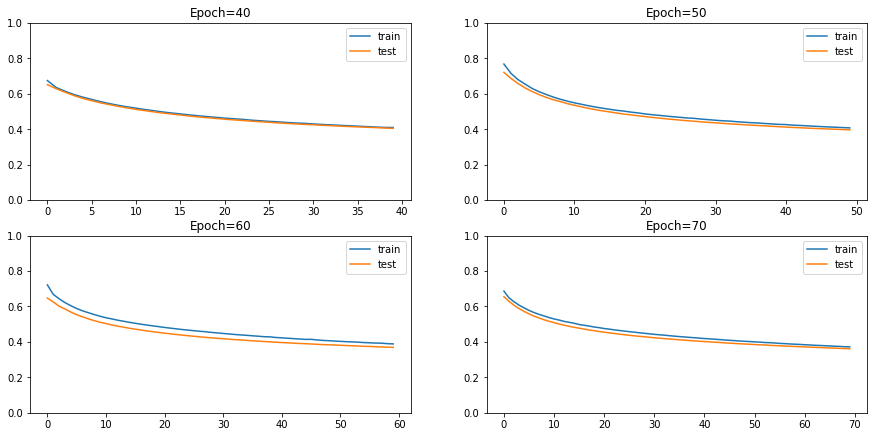

In [ ]:
epoch = [40, 50, 60, 70]


plt.figure(figsize=(15, 15))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, epoch[i])

# show learning curves
plt.show()

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, epoch):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = Adam(learning_rate = 0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=epoch, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Epoch='+str(epoch))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/40
30/30 [==============================] - 5s 88ms/step - loss: 0.7514 - accuracy: 0.4767 - val_loss: 0.7020 - val_accuracy: 0.5612
Epoch 2/40
30/30 [==============================] - 2s 59ms/step - loss: 0.6752 - accuracy: 0.5953 - val_loss: 0.6703 - val_accuracy: 0.5865
Epoch 3/40
30/30 [==============================] - 2s 66ms/step - loss: 0.6389 - accuracy: 0.6345 - val_loss: 0.6449 - val_accuracy: 0.6245
Epoch 4/40
30/30 [==============================] - 2s 69ms/step - loss: 0.6114 - accuracy: 0.6684 - val_loss: 0.6240 - val_accuracy: 0.6582
Epoch 5/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5882 - accuracy: 0.6970 - val_loss: 0.6089 - val_accuracy: 0.6793
Epoch 6/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5696 - accuracy: 0.7129 - val_loss: 0.5961 - val_accuracy: 0.6709
Epoch 7/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5548 - accuracy: 0.7352 - val_loss: 0.5859 - val_accuracy: 0.6878
Epoch 8/40
30

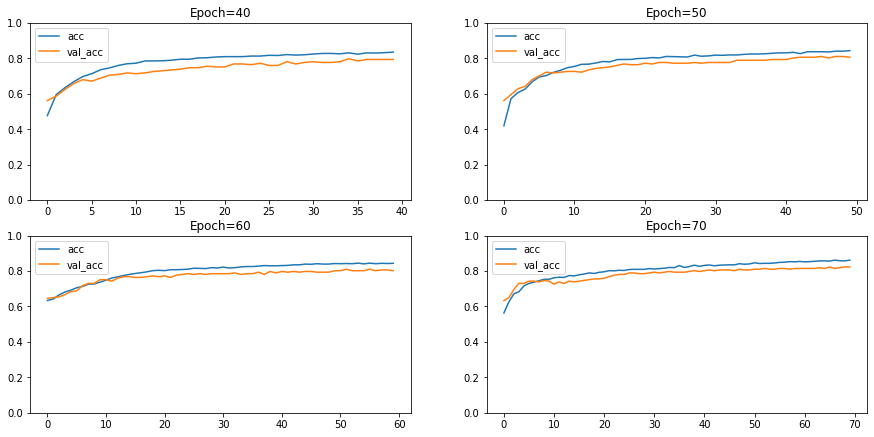

In [ ]:
epoch = [40, 50, 60, 70]


plt.figure(figsize=(15, 15))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, epoch[i])

# show learning curves
plt.show()

# Learning rate

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, lr):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = Adam(learning_rate=lr),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Learning Rate='+str(lr))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
30/30 [==============================] - 5s 96ms/step - loss: 0.6603 - accuracy: 0.6811 - val_loss: 0.3871 - val_accuracy: 0.8270
Epoch 2/50
30/30 [==============================] - 2s 56ms/step - loss: 0.3993 - accuracy: 0.8305 - val_loss: 0.3456 - val_accuracy: 0.8481
Epoch 3/50
30/30 [==============================] - 2s 56ms/step - loss: 0.3688 - accuracy: 0.8369 - val_loss: 0.3654 - val_accuracy: 0.8354
Epoch 4/50
30/30 [==============================] - 2s 56ms/step - loss: 0.3258 - accuracy: 0.8655 - val_loss: 0.2938 - val_accuracy: 0.8819
Epoch 5/50
30/30 [==============================] - 2s 55ms/step - loss: 0.2780 - accuracy: 0.8782 - val_loss: 0.3164 - val_accuracy: 0.8565
Epoch 6/50
30/30 [==============================] - 2s 56ms/step - loss: 0.2656 - accuracy: 0.8941 - val_loss: 0.2778 - val_accuracy: 0.8776
Epoch 7/50
30/30 [==============================] - 2s 56ms/step - loss: 0.2785 - accuracy: 0.8845 - val_loss: 0.2685 - val_accuracy: 0.8945
Epoch 8/50
30

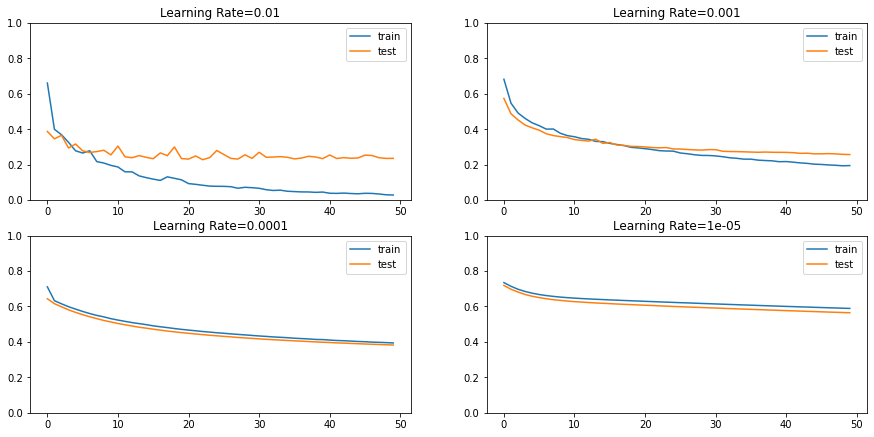

In [ ]:
lr = [0.01, 0.001, 0.0001, 0.00001]


plt.figure(figsize=(15, 15))
for i in range(len(lr)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, lr[i])

# show learning curves
plt.show()

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, lr):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = Adam(learning_rate=lr),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Learning Rate='+str(lr))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
30/30 [==============================] - 5s 89ms/step - loss: 0.6407 - accuracy: 0.7055 - val_loss: 0.5192 - val_accuracy: 0.7553
Epoch 2/50
30/30 [==============================] - 2s 57ms/step - loss: 0.3777 - accuracy: 0.8358 - val_loss: 0.4903 - val_accuracy: 0.7764
Epoch 3/50
30/30 [==============================] - 2s 57ms/step - loss: 0.3283 - accuracy: 0.8602 - val_loss: 0.4096 - val_accuracy: 0.7975
Epoch 4/50
30/30 [==============================] - 2s 57ms/step - loss: 0.2863 - accuracy: 0.8877 - val_loss: 0.3864 - val_accuracy: 0.8059
Epoch 5/50
30/30 [==============================] - 2s 57ms/step - loss: 0.2509 - accuracy: 0.9004 - val_loss: 0.3641 - val_accuracy: 0.8312
Epoch 6/50
30/30 [==============================] - 2s 67ms/step - loss: 0.2613 - accuracy: 0.8909 - val_loss: 0.3969 - val_accuracy: 0.8186
Epoch 7/50
30/30 [==============================] - 2s 68ms/step - loss: 0.2166 - accuracy: 0.9195 - val_loss: 0.3475 - val_accuracy: 0.8354
Epoch 8/50
30

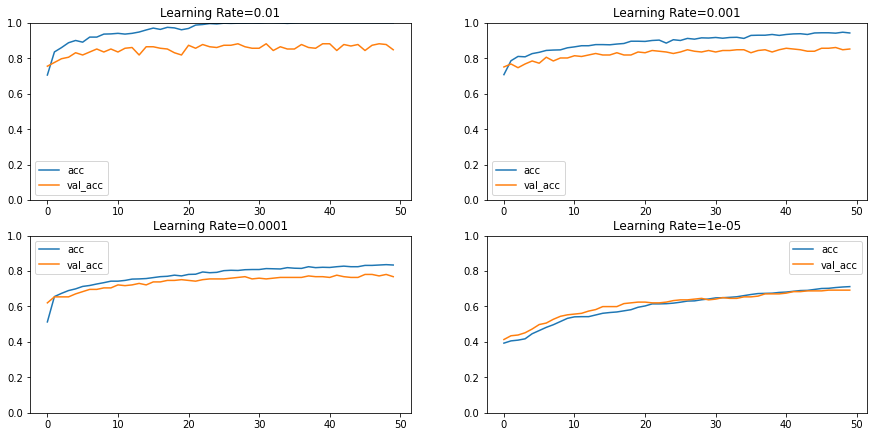

In [ ]:
lr = [0.01, 0.001, 0.0001, 0.00001]


plt.figure(figsize=(15, 15))
for i in range(len(lr)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, lr[i])

# show learning curves
plt.show()

# Optimizer

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, opt):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = opt(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Optimizer='+str(opt))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
30/30 [==============================] - 5s 95ms/step - loss: 0.6966 - accuracy: 0.5742 - val_loss: 0.6591 - val_accuracy: 0.6498
Epoch 2/50
30/30 [==============================] - 2s 56ms/step - loss: 0.6626 - accuracy: 0.6419 - val_loss: 0.6325 - val_accuracy: 0.6751
Epoch 3/50
30/30 [==============================] - 2s 67ms/step - loss: 0.6384 - accuracy: 0.6653 - val_loss: 0.6102 - val_accuracy: 0.6920
Epoch 4/50
30/30 [==============================] - 2s 56ms/step - loss: 0.6183 - accuracy: 0.6939 - val_loss: 0.5894 - val_accuracy: 0.6878
Epoch 5/50
30/30 [==============================] - 2s 56ms/step - loss: 0.6012 - accuracy: 0.7055 - val_loss: 0.5742 - val_accuracy: 0.7257
Epoch 6/50
30/30 [==============================] - 2s 56ms/step - loss: 0.5858 - accuracy: 0.7119 - val_loss: 0.5589 - val_accuracy: 0.7215
Epoch 7/50
30/30 [==============================] - 2s 56ms/step - loss: 0.5728 - accuracy: 0.7203 - val_loss: 0.5456 - val_accuracy: 0.7511
Epoch 8/50
30

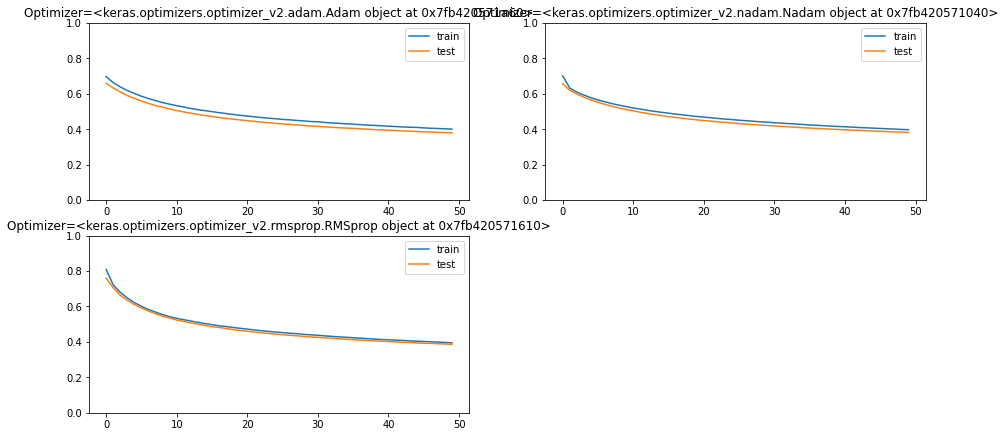

In [ ]:
opt = [Adam, Nadam, RMSprop]


plt.figure(figsize=(15, 15))
for i in range(len(opt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, opt[i])

# show learning curves
plt.show()

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, opt):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = opt(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Optimizer='+str(opt))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
30/30 [==============================] - 5s 88ms/step - loss: 0.7256 - accuracy: 0.5413 - val_loss: 0.6992 - val_accuracy: 0.5738
Epoch 2/50
30/30 [==============================] - 2s 57ms/step - loss: 0.6679 - accuracy: 0.6282 - val_loss: 0.6802 - val_accuracy: 0.6118
Epoch 3/50
30/30 [==============================] - 2s 57ms/step - loss: 0.6474 - accuracy: 0.6462 - val_loss: 0.6634 - val_accuracy: 0.6287
Epoch 4/50
30/30 [==============================] - 2s 57ms/step - loss: 0.6271 - accuracy: 0.6642 - val_loss: 0.6490 - val_accuracy: 0.6414
Epoch 5/50
30/30 [==============================] - 2s 57ms/step - loss: 0.6095 - accuracy: 0.6653 - val_loss: 0.6356 - val_accuracy: 0.6498
Epoch 6/50
30/30 [==============================] - 2s 57ms/step - loss: 0.5935 - accuracy: 0.6790 - val_loss: 0.6242 - val_accuracy: 0.6667
Epoch 7/50
30/30 [==============================] - 2s 57ms/step - loss: 0.5790 - accuracy: 0.6907 - val_loss: 0.6136 - val_accuracy: 0.6793
Epoch 8/50
30

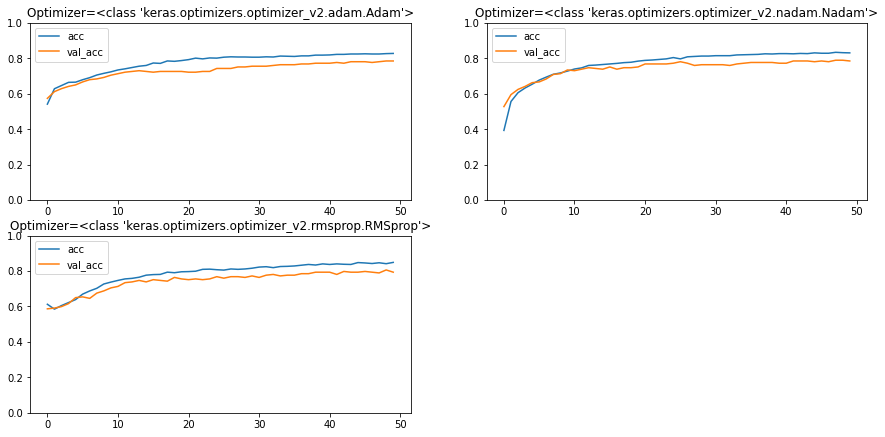

In [ ]:
opt = [Adam, Nadam, RMSprop]


plt.figure(figsize=(15, 15))
for i in range(len(opt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, opt[i])

# show learning curves
plt.show()